### 统计学：检验心理学现象

Title : Test_Perceptual_Phenomenon
By Angelica Zhang


背景信息

在一个Stroop （斯特鲁普）任务中，参与者得到了一列文字，每个文字都用一种油墨颜色展示。参与者的任务是将文字的打印颜色大声说出来。这项任务有两个条件：一致文字条件，和不一致文字条件。在一致文字条件中，显示的文字是与它们的打印颜色匹配的颜色词，如“红色”、“蓝色”。在不一致文字条件中，显示的文字是与它们的打印颜色不匹配的颜色词，如“紫色”、“橙色”。在每个情况中，我们将计量说出同等大小的列表中的墨色名称的时间。每位参与者必须全部完成并记录每种条件下使用的时间。

调查问题


(1) 我们的自变量是什么？因变量是什么？

自变量： 一致文字条件 和 不一致文字条件

因变量： 说出墨色名称的时间

(2) 此任务的适当假设集是什么？你需要以文字和数学符号方式对假设集中的零假设和对立假设加以说明，并对数学符号进行定义。你想执行什么类型的统计检验？为你的选择提供正当理由（比如，为何该实验满足你所选统计检验的前置条件）。

零假设：在一致文字条件下，说出正确墨色所花费的平均时间$\mu_{con}$，比在不一致文字条件下的所花费平均时间$\mu_{con}$更长


备选假设：在一致文字条件下，说出正确墨色所花费的平均时间$\mu_{con}$，比在不一致文字条件下的所花费平均时间$\mu_{con}$相同或更短



$$H_0: \mu_{incon} - \mu_{con}  < 0$$
$$H_1: \mu_{incon} -  \mu_{con} >=  0$$










执行的统计检验：单尾t检验

选择理由：

- 因为数据集中的样本是相依样本（dependet sample），即同一个人完成两种条件下的实验所记录的样本数据

- 受试者是独立完成两次实验

- 样本量少于30，使得总体的分布假定很难预料，使得z检验会难免出现偏差，而t检验对于整体正态型的假设十分可靠，使用t检验会更为稳妥

- 零假设H_0中$H_0: \mu_{incon} - \mu_{con}  < 0$，拒绝零假设的标准决定了使用单尾





(3) 报告关于此数据集的一些描述性统计。包含至少一个集中趋势测量和至少一个变异测量。

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

df = pd.read_csv("stroopdata.csv")

In [2]:
df.head()

,Congruent,Incongruent
0,12.079,19.278
1,16.791,18.741
2,9.564,21.214
3,8.630,15.687
4,14.669,22.803


In [3]:
df.shape

(24, 2)

In [4]:
#集中趋势测量和变异测量
df.describe()

,Congruent,Incongruent
count,24.000000,24.000000
mean,14.051125,22.015917
std,3.559358,4.797057
min,8.630000,15.687000
25%,11.895250,18.716750
50%,14.356500,21.017500
75%,16.200750,24.051500
max,22.328000,35.255000


In [5]:
#中位数
df.median()

Congruent      14.3565
Incongruent    21.0175
dtype: float64

集中趋势测量：

均值 —— congruent组的均值是14.051125秒，incongruent组的均值是22.015917秒；

中位数 —— congruent组的中位数是14.3565秒，incongruent组的中位数是21.0175秒；


变异测量：

标准差 -- congruent组的标准差是3.559358秒，incongruent组的标准差是4.797057秒；

(4) 提供显示样本数据分布的一个或两个可视化。用一两句话说明你从图中观察到的结果。

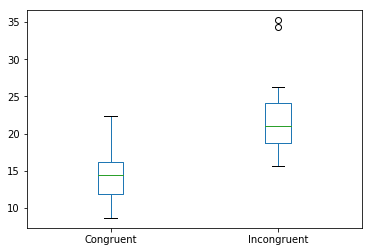

In [6]:
df.plot(kind="box");

从数据分布来看，congruent组的数据比incongruent的跨度更大,而且incongruent组有异常值；

从花费时间的平均数来看，incongruent的平均数明显高于congruent的平均数。

Text(0.5,0,'Time(sec)')

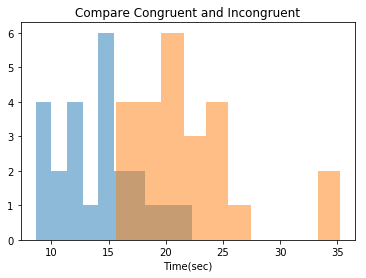

In [7]:
plt.hist(df['Congruent'], alpha = 0.5);
plt.hist(df['Incongruent'], alpha = 0.5);
plt.title('Compare Congruent and Incongruent')
plt.xlabel('Time(sec)')

将两组数据放在一起对比，橙色代表的incongruent组，明显比蓝色代表的congruent组花费的时间更长

(5) 现在，执行统计测试并报告你的结果。你的置信水平和关键统计值是多少？你是否成功拒绝零假设？对试验任务得出一个结论。结果是否与你的期望一致？

In [9]:
from scipy.stats import ttest_rel

ttest_rel(df['Congruent'],df['Incongruent'])

Ttest_relResult(statistic=-8.020706944109957, pvalue=4.1030005857111781e-08)

关键统计值p-value : 4.103

t统计量t-statistic ：-8.021

自由度：观测值减去一，即24-1 =23，自由度为23 

在设定I类错误阀值为5%的情况下，

置信水平为 95%，

t检验的临界值：1.714；

在设定I类错误阀值为1%的情况下，

置信水平为 99%，

t检验的临界值：2.500；

因为t统计量（t-statistic）已经超过了t临界值，落在了临界区内。

我们得出的结论是：根据数据，与期望一致，成功拒绝零假设

即：在一致文字条件下，说出正确墨色所花费的平均时间，比在不一致文字条件下的所花费时间短

Reference :


    https://classroom.udacity.com/courses/ud201
    
    https://support.minitab.com/zh-cn/minitab/18/help-and-how-to/statistics/basic-statistics/supporting-topics/basics/what-is-a-confidence-interval/
    
    